In [4]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
from copy import copy
from skimage import morphology
import pandas as pd
import itertools
import math
import scipy.stats as stats
import seaborn as sns


plt.rcParams['figure.figsize'] = (10,6)
%config InlineBackend.figure_format = 'retina'

In [5]:
def main(i):
    path = r"/Volumes/Public/DeepLearningData/016_Nakamura_Exp313/annotations/manually_mito_01-for-per-cell-quantification-220823//" +  str(i).zfill(4) + ".png"
    mito_er = cv2.imread(path, 0)
    mito =  copy(mito_er) 
    mito[mito != 1] = 0
    er =  copy(mito_er) 
    er[er != 2] = 0
    er = er/2
    mito_peri_3 = morphology.binary_dilation(mito, morphology.diamond(3)).astype(np.uint8) - morphology.binary_dilation(mito, morphology.diamond(2)).astype(np.uint8)
    mito_peri = morphology.binary_dilation(mito, morphology.diamond(1)).astype(np.uint8) - morphology.binary_dilation(mito, morphology.diamond(0)).astype(np.uint8)

    img = np.zeros(mito.shape + (3,), np.float32)
    img[:,:,0] = mito 
    img[:,:,1] = mito_peri_3
    img[:,:,2] = (mito_peri_3 + er)//2
    path_mito_er = r"/Volumes/Public/DeepLearningData/016_Nakamura_Exp313/annotation/mito_er//mito_er_-for-per-cell-quantification" +  str(i).zfill(4) + ".png"
    cv2.imwrite(path_mito_er, img*255)
    ans = np.sum(img[:,:,2]) / np.sum(mito_peri)
    print(f"image{i} {ans}")
    return ans

In [6]:

shCtrl_Ctrl = []
for i in range(0,17):

    shCtrl_Ctrl.append(main(i))

shCtrl_Tam = []
for i in range(17, 34):
    
    shCtrl_Tam.append(main(i))


shFKBP8_Ctrl = []
for i in range(34, 54):
    shFKBP8_Ctrl.append(main(i))
  
    
shFKBP8_Tam = []
for i in range(54, 73):
        shFKBP8_Tam.append(main(i))
    

[ WARN:0@0.882] global loadsave.cpp:848 imwrite_ Unsupported depth image for selected encoder is fallbacked to CV_8U.


image0 0.07329842931937172
image1 0.0715372907153729
image2 0.05533769063180828
image3 0.08547815820543093
image4 0.04652450844641374
image5 0.03280224929709466
image6 0.024739080015461924
image7 0.06764928193499622
image8 0.06832298136645963
image9 0.08262295081967214
image10 0.06988472622478387
image11 0.08476637137397951
image12 0.06967363403006967
image13 0.025533193151096426
image14 0.014438751746623195
image15 0.08752025931928688
image16 0.028629856850715747
image17 0.04379038047379756
image18 0.1389496717724289
image19 0.00851063829787234
image20 0.023514851485148515
image21 0.06392199349945829
image22 0.07902298850574713
image23 0.03229337712096333
image24 0.02359271523178808
image25 0.038461538461538464
image26 0.014847809948032665
image27 0.05905511811023622
image28 0.033677765021048606
image29 0.06256062075654704
image30 0.031309660175639555
image31 0.06301251618472162
image32 0.006269592476489028
image33 0.017253774263120056
image34 0.023809523809523808
image35 0.0254609306

/var/folders/d7/0kyypypn3vl3pj9hqq2l66840000gp/T/ipykernel_6451/2976394672.py:18: RuntimeWarning: invalid value encountered in divide
  ans = np.sum(img[:,:,2]) / np.sum(mito_peri)


image46 0.032885906040268455
image47 0.022151898734177215
image48 0.03962264150943396
image49 0.03925099027727764
image50 0.05529715762273902
image51 nan
image52 0.03287461773700306
image53 0.050274223034734916
image54 0.031639501438159155
image55 0.030232558139534883
image56 0.09001837109614207
image57 0.017597551644988524
image58 0.028582770940849545
image59 0.0227183705444575
image60 0.09337676438653637
image61 0.029661016949152543
image62 0.023076923076923078
image63 0.004995458673932788
image64 0.07475083056478406
image65 0.020123839009287926
image66 0.0058823529411764705
image67 0.009075907590759076
image68 0.032435939020434644
image69 0.03358813991197591
image70 0.055639097744360905
image71 0.013805522208883553
image72 0.023006134969325152


In [7]:
df1 = pd.DataFrame({"Condition": "shCtrl_Tam-", "mito-er contact / mito_perimeter" : shCtrl_Ctrl})
df2 = pd.DataFrame({"Condition": "shCtrl_Tam+", "mito-er contact / mito_perimeter" : shCtrl_Tam})
df3 =  pd.DataFrame({"Condition": "shFKBP8_Tam-", "mito-er contact / mito_perimeter" : shFKBP8_Ctrl})
df4 =  pd.DataFrame({"Condition": "shFKBP8_Tam+", "mito-er contact / mito_perimeter" : shFKBP8_Tam})

df = pd.concat([df1,df2], ignore_index=True)
df = pd.concat([df,df3], ignore_index=True)
df = pd.concat([df,df4], ignore_index=True)
df = df.dropna()
#df.to_csv(r"/Volumes/Public/DeepLearningData/016_Nakamura_Exp313/data//mito_er_contact_per_image-for-per-cell-quantification_8px.csv")
df

,Condition,mito-er contact / mito_perimeter
0,shCtrl_Tam-,0.073298
1,shCtrl_Tam-,0.071537
2,shCtrl_Tam-,0.055338
3,shCtrl_Tam-,0.085478
4,shCtrl_Tam-,0.046525
...,...,...
68,shFKBP8_Tam+,0.032436
69,shFKBP8_Tam+,0.033588
70,shFKBP8_Tam+,0.055639
71,shFKBP8_Tam+,0.013806


In [8]:
df = df.dropna()

In [9]:
pd.set_option('display.max_rows', 80)
df

,Condition,mito-er contact / mito_perimeter
0,shCtrl_Tam-,0.073298
1,shCtrl_Tam-,0.071537
2,shCtrl_Tam-,0.055338
3,shCtrl_Tam-,0.085478
4,shCtrl_Tam-,0.046525
5,shCtrl_Tam-,0.032802
6,shCtrl_Tam-,0.024739
7,shCtrl_Tam-,0.067649
8,shCtrl_Tam-,0.068323
9,shCtrl_Tam-,0.082623


In [10]:
df.groupby("Condition").describe()

mito-er contact / mito_perimeter                                \
                                        count      mean       std       min   
Condition                                                                     
shCtrl_Tam+                              17.0  0.043532  0.032680  0.006270   
shCtrl_Tam-                              17.0  0.058162  0.024415  0.014439   
shFKBP8_Tam+                             19.0  0.033695  0.026195  0.004995   
shFKBP8_Tam-                             18.0  0.035679  0.020416  0.000000   

                                                      
                   25%       50%       75%       max  
Condition                                             
shCtrl_Tam+   0.023515  0.033678  0.062561  0.138950  
shCtrl_Tam-   0.032802  0.068323  0.073298  0.087520  
shFKBP8_Tam+  0.018861  0.028583  0.033012  0.093377  
shFKBP8_Tam-  0.024222  0.036948  0.048193  0.071735

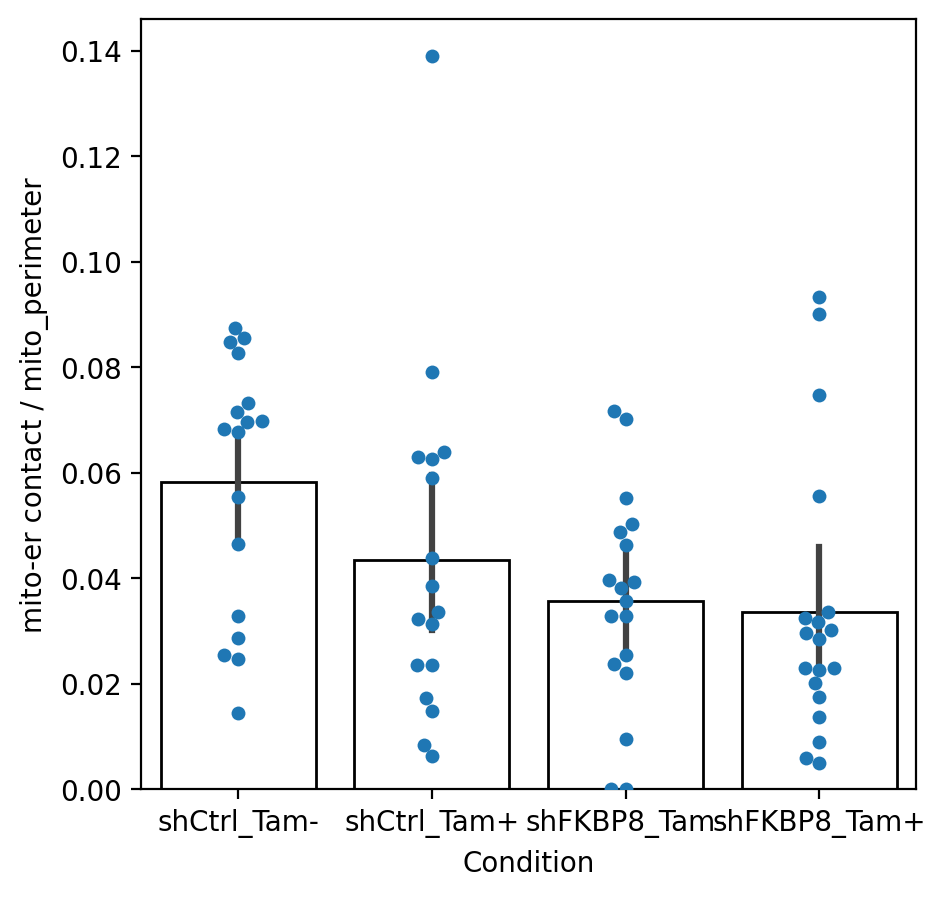

In [11]:
fig = plt.figure(figsize=(5, 5))
ax1 = fig.add_subplot(111)
ax1 = sns.swarmplot(x="Condition", y="mito-er contact / mito_perimeter", 
                    data=df, dodge=True) #
#ax1 = sns.boxplot(data=df, x="Condition", y='sum of intensity', orient='v', color='white')
ax1 = sns.barplot(data=df, x ="Condition", y = "mito-er contact / mito_perimeter", color = "white", edgecolor = "black")

#plt.title('Overlap (PDZD8 intensity on mito)')